In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import os

image_path = r"C:\Users\acer\Downloads\download.jpeg"  # Raw string
if os.path.exists(image_path):
    print("File exists:", image_path)
else:
    print("File not found at:", image_path)



File exists: C:\Users\acer\Downloads\download.jpeg


In [24]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [25]:
blurred_image = cv2.GaussianBlur(image, (25, 25), sigmaX=30, sigmaY=30)


In [26]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 100, 200)  # Edge detection



In [27]:
dilated_edges = cv2.dilate(edges, kernel=np.ones((3, 3), np.uint8), iterations=1)

In [28]:
mask = cv2.bitwise_not(dilated_edges)
mask = cv2.GaussianBlur(mask, (21, 21), sigmaX=10)


In [29]:
mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask_normalized = mask_3channel / 255.0



In [30]:

blended_image = (image * mask_normalized + blurred_image * (1 - mask_normalized)).astype(np.uint8)



In [31]:
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(-0.5, 258.5, 193.5, -0.5)

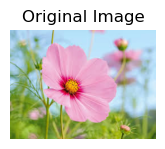

In [32]:
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

(-0.5, 258.5, 193.5, -0.5)

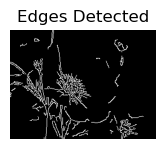

In [33]:
plt.subplot(1, 3, 2)
plt.title("Edges Detected")
plt.imshow(edges, cmap="gray")
plt.axis("off")


(-0.5, 258.5, 193.5, -0.5)

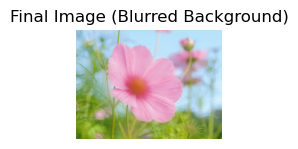

In [34]:
plt.subplot(1, 3, 3)
plt.title("Final Image (Blurred Background)")
plt.imshow(blended_image)
plt.axis("off")

In [35]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [8]:
%matplotlib inline


In [12]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact

# Load your image and convert to grayscale
image = cv2.imread(r"C:\Users\acer\Downloads\download.jpeg")  # Specify the correct path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def edge_detection(t1=50, t2=150):
    edges = cv2.Canny(gray_image, t1, t2)
    plt.figure(figsize=(10, 6))
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edges Detected (Thresholds: {t1}, {t2})")
    plt.axis("off")
    plt.show()

# Create the interactive widget
interact(edge_detection, t1=(0, 255), t2=(0, 255))


interactive(children=(IntSlider(value=50, description='t1', max=255), IntSlider(value=150, description='t2', m…

<function __main__.edge_detection(t1=50, t2=150)>

In [13]:
%matplotlib notebook


In [21]:
image = cv2.imread(r"C:\Users\acer\Downloads\download.jpeg")  # Replace 'image.jpg' with your actual file name

